In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sbn
import scipy.stats as stats
from pandas.plotting import scatter_matrix
import statsmodels.api as sm
import datetime as dt
import pandasql as ps

In [2]:
data = pd.read_csv('~/Downloads/EIA930_BALANCE_2020_Jan_Jun.csv')
data_2 = pd.read_csv('~/Downloads/EIA930_BALANCE_2020_Jul_Dec.csv')

/Users/cp/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (11,14,15,16,17,19,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/cp/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (11,14,16,17,19,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
def change_cols_to_floats(dataframe,lst):
    
    for i in lst:
        dataframe[i] = dataframe[i].str.replace(',', '')
        dataframe[i] = dataframe[i].astype(float)
    return dataframe
def make_date_time_col(df):
    df['Hour Number'] = df_total['Hour Number'].replace(24, 0)
    df['Hour Number'] = df_total['Hour Number'].replace(25, 0)
    df['Data Date']= df['Data Date'].astype(str)
    df['Hour Number'] = df['Hour Number'].astype(str)
    df['New_datetime'] = df['Data Date'].map(str) + " " + df['Hour Number']
    df['Hour Number'] = df['Hour Number'].astype(int)
    
    return df

def make_hourly_demand_means(df,lst):
    d = {}
    for i in lst:
        filt =df['Hour Number']==i
        d[i] = df.loc[filt]['Demand (MW)'].mean()
    return d

def graph_maker_for_energy_type_by_hour(df,column, lst = np.arange(0,24)):
    
    d= {}
    for i in lst:
        filt =df['Hour Number']==i
        hour_avg = df.loc[filt][column].mean()
        d[i]=hour_avg
    x = d.keys()
    y = d.values()
    fig, ax =plt.subplots(figsize = (8,8))
    ax.plot(x, y)
    ax.set_title(column)
    ax.set_xlabel('Hours in Day')
    ax.set_xticks(lst)
    
    
    plt.show()

In [4]:
lst_cols = ['Demand (MW)','Net Generation (MW) from Natural Gas', 'Net Generation (MW) from Nuclear','Net Generation (MW) from All Petroleum Products','Net Generation (MW) from Hydropower and Pumped Storage', 'Net Generation (MW) from Solar', 'Net Generation (MW) from Wind', 'Net Generation (MW) from Other Fuel Sources','Net Generation (MW)','Demand Forecast (MW)', 'Total Interchange (MW)', 'Net Generation (MW) (Adjusted)','Net Generation (MW) from Coal','Sum(Valid DIBAs) (MW)','Demand (MW) (Imputed)', 'Net Generation (MW) (Imputed)','Demand (MW) (Adjusted)']
data_convert = change_cols_to_floats(data, lst_cols)
data_2_convert = change_cols_to_floats(data_2, lst_cols)

In [5]:
lst_data = [data_convert,data_2_convert]
df_total = pd.concat(lst_data)

In [6]:
make_date_time_col(df_total)

,Balancing Authority,Data Date,Hour Number,Local Time at End of Hour,UTC Time at End of Hour,Demand Forecast (MW),Demand (MW),Net Generation (MW),Total Interchange (MW),Sum(Valid DIBAs) (MW),...,Net Generation (MW) from Coal,Net Generation (MW) from Natural Gas,Net Generation (MW) from Nuclear,Net Generation (MW) from All Petroleum Products,Net Generation (MW) from Hydropower and Pumped Storage,Net Generation (MW) from Solar,Net Generation (MW) from Wind,Net Generation (MW) from Other Fuel Sources,Net Generation (MW) from Unknown Fuel Sources,New_datetime
0,AEC,01/01/2020,1,01/01/2020 1:00:00 AM,01/01/2020 7:00:00 AM,1082.0,549.0,722.0,173.0,173.0,...,-5.0,722.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,01/01/2020 1
1,AEC,01/01/2020,2,01/01/2020 2:00:00 AM,01/01/2020 8:00:00 AM,1084.0,549.0,724.0,175.0,175.0,...,-3.0,722.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,01/01/2020 2
2,AEC,01/01/2020,3,01/01/2020 3:00:00 AM,01/01/2020 9:00:00 AM,1103.0,554.0,718.0,164.0,164.0,...,-6.0,719.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,01/01/2020 3
3,AEC,01/01/2020,4,01/01/2020 4:00:00 AM,01/01/2020 10:00:00 AM,1127.0,565.0,715.0,150.0,150.0,...,-4.0,714.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,01/01/2020 4
4,AEC,01/01/2020,5,01/01/2020 5:00:00 AM,01/01/2020 11:00:00 AM,1179.0,575.0,718.0,143.0,143.0,...,-4.0,717.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,01/01/2020 5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282671,YAD,12/31/2020,20,12/31/2020 8:00:00 PM,01/01/2021 1:00:00 AM,NaN,NaN,154.0,150.0,150.0,...,NaN,NaN,NaN,NaN,154.0,NaN,NaN,NaN,NaN,12/31/2020 20
282672,YAD,12/31/2020,21,12/31/2020 9:00:00 PM,01/01/2021 2:00:00 AM,NaN,NaN,153.0,150.0,150.0,...,NaN,NaN,NaN,NaN,153.0,NaN,NaN,NaN,NaN,12/31/2020 21
282673,YAD,12/31/2020,22,12/31/2020 10:00:00 PM,01/01/2021 3:00:00 AM,NaN,NaN,154.0,150.0,150.0,...,NaN,NaN,NaN,NaN,154.0,NaN,NaN,NaN,NaN,12/31/2020 22
282674,YAD,12/31/2020,23,12/31/2020 11:00:00 PM,01/01/2021 4:00:00 AM,NaN,NaN,154.0,151.0,151.0,...,NaN,NaN,NaN,NaN,154.0,NaN,NaN,NaN,NaN,12/31/2020 23


In [7]:
df_total['New_datetime']= df_total['New_datetime'].apply(lambda x:f'{x}:00:00')

In [8]:
df_total['New_datetime'] = pd.to_datetime(df_total['New_datetime'],infer_datetime_format=True, format ='%m/%d/%Y %H')

In [9]:
df_total['Demand Delta'] = df_total['Demand Forecast (MW)']- df_total['Demand (MW)']

In [10]:
df_total['Net Generation Delta'] = df_total['Net Generation (MW)']- df_total['Demand (MW)']

In [11]:
lst_hours = np.arange(0,24)  



In [12]:
make_hourly_demand_means(df_total, lst_hours)

{0: 6922.334387109932,
 1: 6468.399511301161,
 2: 7152.640769779045,
 3: 6998.285416030146,
 4: 6080.086872390264,
 5: 6139.650081482991,
 6: 7206.099302337424,
 7: 6713.549602770422,
 8: 7886.163865974132,
 9: 7288.728217141112,
 10: 8347.805948864216,
 11: 8533.530891865736,
 12: 8727.126273431133,
 13: 8886.620427916454,
 14: 9009.337477073568,
 15: 7399.706598726115,
 16: 9188.23905620955,
 17: 9310.143082802548,
 18: 8617.770575345257,
 19: 9469.125522372848,
 20: 9308.599133537207,
 21: 6532.888237692386,
 22: 7189.769430711992,
 23: 7388.96743119266}

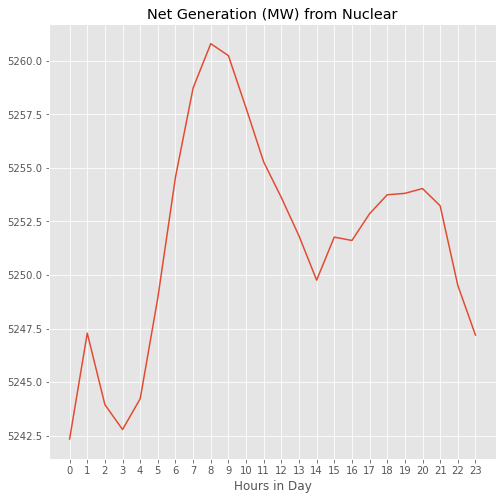

In [14]:
graph_maker_for_energy_type_by_hour(df_total,'Net Generation (MW) from Nuclear') 

# TEXAS ERCOT

In [15]:
filter_1 = df_total['Balancing Authority'] == 'ERCO'
df_texas = df_total[filter_1]
df_texas

,Balancing Authority,Data Date,Hour Number,Local Time at End of Hour,UTC Time at End of Hour,Demand Forecast (MW),Demand (MW),Net Generation (MW),Total Interchange (MW),Sum(Valid DIBAs) (MW),...,Net Generation (MW) from Nuclear,Net Generation (MW) from All Petroleum Products,Net Generation (MW) from Hydropower and Pumped Storage,Net Generation (MW) from Solar,Net Generation (MW) from Wind,Net Generation (MW) from Other Fuel Sources,Net Generation (MW) from Unknown Fuel Sources,New_datetime,Demand Delta,Net Generation Delta
66924,ERCO,01/01/2020,1,01/01/2020 1:00:00 AM,01/01/2020 7:00:00 AM,37761.0,36649.0,36521.0,-128.0,-128.0,...,5117.0,NaN,20.0,0.0,12842.0,17.0,NaN,2020-01-01 01:00:00,1112.0,-128.0
66925,ERCO,01/01/2020,2,01/01/2020 2:00:00 AM,01/01/2020 8:00:00 AM,37154.0,36352.0,36225.0,-128.0,-128.0,...,5117.0,NaN,12.0,0.0,13340.0,13.0,NaN,2020-01-01 02:00:00,802.0,-127.0
66926,ERCO,01/01/2020,3,01/01/2020 3:00:00 AM,01/01/2020 9:00:00 AM,36644.0,35883.0,35824.0,-60.0,-60.0,...,5117.0,NaN,3.0,0.0,13926.0,15.0,NaN,2020-01-01 03:00:00,761.0,-59.0
66927,ERCO,01/01/2020,4,01/01/2020 4:00:00 AM,01/01/2020 10:00:00 AM,36668.0,35654.0,35532.0,-123.0,-123.0,...,5117.0,NaN,5.0,0.0,14458.0,12.0,NaN,2020-01-01 04:00:00,1014.0,-122.0
66928,ERCO,01/01/2020,5,01/01/2020 5:00:00 AM,01/01/2020 11:00:00 AM,36600.0,35816.0,35737.0,-80.0,-81.0,...,5117.0,NaN,42.0,0.0,14735.0,13.0,NaN,2020-01-01 05:00:00,784.0,-79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70664,ERCO,12/31/2020,20,12/31/2020 8:00:00 PM,01/01/2021 2:00:00 AM,47945.0,49447.0,49287.0,-160.0,-161.0,...,5125.0,NaN,42.0,0.0,15591.0,12.0,NaN,2020-12-31 20:00:00,-1502.0,-160.0
70665,ERCO,12/31/2020,21,12/31/2020 9:00:00 PM,01/01/2021 3:00:00 AM,47758.0,48353.0,48320.0,-32.0,-32.0,...,5125.0,NaN,27.0,0.0,15447.0,11.0,NaN,2020-12-31 21:00:00,-595.0,-33.0
70666,ERCO,12/31/2020,22,12/31/2020 10:00:00 PM,01/01/2021 4:00:00 AM,47067.0,47095.0,47208.0,113.0,112.0,...,5125.0,NaN,19.0,0.0,14994.0,10.0,NaN,2020-12-31 22:00:00,-28.0,113.0
70667,ERCO,12/31/2020,23,12/31/2020 11:00:00 PM,01/01/2021 5:00:00 AM,45514.0,45460.0,45418.0,-42.0,-43.0,...,5127.0,NaN,0.0,0.0,14558.0,13.0,NaN,2020-12-31 23:00:00,54.0,-42.0


In [16]:
catagories_lst = ['Demand Forecast (MW)''Net Generation (MW) (Imputed)',
       'Demand (MW) (Adjusted)', 'Net Generation (MW) (Adjusted)',
       'Net Generation (MW) from Coal', 'Net Generation (MW) from Natural Gas',
       'Net Generation (MW) from Nuclear',
       'Net Generation (MW) from All Petroleum Products',
       'Net Generation (MW) from Hydropower and Pumped Storage',
       'Net Generation (MW) from Solar', 'Net Generation (MW) from Wind','Demand Delta', 'Net Generation Delta']

In [17]:
del df_texas['UTC Time at End of Hour']
del df_texas['Balancing Authority']
del df_texas['Net Generation (MW) (Imputed)']
del df_texas['Demand (MW) (Imputed)']
del df_texas['Net Generation (MW) from All Petroleum Products']
del df_texas['Net Generation (MW) from Unknown Fuel Sources']
del df_texas['Data Date']
del df_texas['Hour Number']
del df_texas['Local Time at End of Hour']
df_texas

,Data Date,Hour Number,Local Time at End of Hour,Demand Forecast (MW),Demand (MW),Net Generation (MW),Total Interchange (MW),Sum(Valid DIBAs) (MW),Demand (MW) (Imputed),Demand (MW) (Adjusted),...,Net Generation (MW) from Nuclear,Net Generation (MW) from All Petroleum Products,Net Generation (MW) from Hydropower and Pumped Storage,Net Generation (MW) from Solar,Net Generation (MW) from Wind,Net Generation (MW) from Other Fuel Sources,Net Generation (MW) from Unknown Fuel Sources,New_datetime,Demand Delta,Net Generation Delta
66924,01/01/2020,1,01/01/2020 1:00:00 AM,37761.0,36649.0,36521.0,-128.0,-128.0,NaN,36649.0,...,5117.0,NaN,20.0,0.0,12842.0,17.0,NaN,2020-01-01 01:00:00,1112.0,-128.0
66925,01/01/2020,2,01/01/2020 2:00:00 AM,37154.0,36352.0,36225.0,-128.0,-128.0,NaN,36352.0,...,5117.0,NaN,12.0,0.0,13340.0,13.0,NaN,2020-01-01 02:00:00,802.0,-127.0
66926,01/01/2020,3,01/01/2020 3:00:00 AM,36644.0,35883.0,35824.0,-60.0,-60.0,NaN,35883.0,...,5117.0,NaN,3.0,0.0,13926.0,15.0,NaN,2020-01-01 03:00:00,761.0,-59.0
66927,01/01/2020,4,01/01/2020 4:00:00 AM,36668.0,35654.0,35532.0,-123.0,-123.0,NaN,35654.0,...,5117.0,NaN,5.0,0.0,14458.0,12.0,NaN,2020-01-01 04:00:00,1014.0,-122.0
66928,01/01/2020,5,01/01/2020 5:00:00 AM,36600.0,35816.0,35737.0,-80.0,-81.0,NaN,35816.0,...,5117.0,NaN,42.0,0.0,14735.0,13.0,NaN,2020-01-01 05:00:00,784.0,-79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70664,12/31/2020,20,12/31/2020 8:00:00 PM,47945.0,49447.0,49287.0,-160.0,-161.0,NaN,49447.0,...,5125.0,NaN,42.0,0.0,15591.0,12.0,NaN,2020-12-31 20:00:00,-1502.0,-160.0
70665,12/31/2020,21,12/31/2020 9:00:00 PM,47758.0,48353.0,48320.0,-32.0,-32.0,NaN,48353.0,...,5125.0,NaN,27.0,0.0,15447.0,11.0,NaN,2020-12-31 21:00:00,-595.0,-33.0
70666,12/31/2020,22,12/31/2020 10:00:00 PM,47067.0,47095.0,47208.0,113.0,112.0,NaN,47095.0,...,5125.0,NaN,19.0,0.0,14994.0,10.0,NaN,2020-12-31 22:00:00,-28.0,113.0
70667,12/31/2020,23,12/31/2020 11:00:00 PM,45514.0,45460.0,45418.0,-42.0,-43.0,NaN,45460.0,...,5127.0,NaN,0.0,0.0,14558.0,13.0,NaN,2020-12-31 23:00:00,54.0,-42.0


In [23]:
df_texas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8784 entries, 66924 to 70668
Data columns (total 20 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   Data Date                                               8784 non-null   object        
 1   Hour Number                                             8784 non-null   int64         
 2   Local Time at End of Hour                               8784 non-null   object        
 3   Demand Forecast (MW)                                    8784 non-null   float64       
 4   Demand (MW)                                             8784 non-null   float64       
 5   Net Generation (MW)                                     8784 non-null   float64       
 6   Total Interchange (MW)                                  8784 non-null   float64       
 7   Sum(Valid DIBAs) (MW)                                  

In [25]:
df_texas


,Demand Forecast (MW),Demand (MW),Net Generation (MW),Total Interchange (MW),Sum(Valid DIBAs) (MW),Demand (MW) (Adjusted),Net Generation (MW) (Adjusted),Net Generation (MW) from Coal,Net Generation (MW) from Natural Gas,Net Generation (MW) from Nuclear,Net Generation (MW) from Hydropower and Pumped Storage,Net Generation (MW) from Solar,Net Generation (MW) from Wind,Net Generation (MW) from Other Fuel Sources,New_datetime,Demand Delta,Net Generation Delta
66924,37761.0,36649.0,36521.0,-128.0,-128.0,36649.0,36521.0,5787.0,12738.0,5117.0,20.0,0.0,12842.0,17.0,2020-01-01 01:00:00,1112.0,-128.0
66925,37154.0,36352.0,36225.0,-128.0,-128.0,36352.0,36225.0,5761.0,11982.0,5117.0,12.0,0.0,13340.0,13.0,2020-01-01 02:00:00,802.0,-127.0
66926,36644.0,35883.0,35824.0,-60.0,-60.0,35883.0,35824.0,5726.0,11037.0,5117.0,3.0,0.0,13926.0,15.0,2020-01-01 03:00:00,761.0,-59.0
66927,36668.0,35654.0,35532.0,-123.0,-123.0,35654.0,35532.0,5606.0,10334.0,5117.0,5.0,0.0,14458.0,12.0,2020-01-01 04:00:00,1014.0,-122.0
66928,36600.0,35816.0,35737.0,-80.0,-81.0,35816.0,35737.0,5503.0,10326.0,5117.0,42.0,0.0,14735.0,13.0,2020-01-01 05:00:00,784.0,-79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70664,47945.0,49447.0,49287.0,-160.0,-161.0,49447.0,49287.0,7456.0,21061.0,5125.0,42.0,0.0,15591.0,12.0,2020-12-31 20:00:00,-1502.0,-160.0
70665,47758.0,48353.0,48320.0,-32.0,-32.0,48353.0,48320.0,6718.0,20991.0,5125.0,27.0,0.0,15447.0,11.0,2020-12-31 21:00:00,-595.0,-33.0
70666,47067.0,47095.0,47208.0,113.0,112.0,47095.0,47208.0,6278.0,20781.0,5125.0,19.0,0.0,14994.0,10.0,2020-12-31 22:00:00,-28.0,113.0
70667,45514.0,45460.0,45418.0,-42.0,-43.0,45460.0,45418.0,6405.0,19316.0,5127.0,0.0,0.0,14558.0,13.0,2020-12-31 23:00:00,54.0,-42.0


In [26]:
df_texas.to_csv (r'/Users/cp/Desktop/capstone2/DF_TEXAS_FINAL_ENERGY_cleanv1.csv', index = False, header=True)

In [34]:
df_dallas =pd.read_csv('/Users/cp/Desktop/capstone2/DALLASV1_FINAL_WEATHER.csv')

ValueError: You are trying to merge on datetime64[ns] and object columns. If you wish to proceed you should use pd.concat

In [33]:
df_texas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8784 entries, 66924 to 70668
Data columns (total 17 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   Demand Forecast (MW)                                    8784 non-null   float64       
 1   Demand (MW)                                             8784 non-null   float64       
 2   Net Generation (MW)                                     8784 non-null   float64       
 3   Total Interchange (MW)                                  8784 non-null   float64       
 4   Sum(Valid DIBAs) (MW)                                   8784 non-null   float64       
 5   Demand (MW) (Adjusted)                                  8784 non-null   float64       
 6   Net Generation (MW) (Adjusted)                          8784 non-null   float64       
 7   Net Generation (MW) from Coal                          

In [38]:
df_dallas['New_datetime'] = pd.to_datetime(df_dallas['New_datetime'],infer_datetime_format=True,format ='%m/%d/%Y %H')

In [39]:
Energy_Houston_weather=df_texas.merge(df_dallas, left_on ='New_datetime', right_on='New_datetime' )

In [40]:
Energy_Houston_weather

,Demand Forecast (MW),Demand (MW),Net Generation (MW),Total Interchange (MW),Sum(Valid DIBAs) (MW),Demand (MW) (Adjusted),Net Generation (MW) (Adjusted),Net Generation (MW) from Coal,Net Generation (MW) from Natural Gas,Net Generation (MW) from Nuclear,...,Net Generation Delta,temp,dew,humidity,wind_speed,pressure,precip,cloud,New_datetime2,time_rounded4
0,38188.0,38186.0,38193.0,6.0,6.0,38186.0,38193.0,4205.0,18572.0,5120.0,...,7.0,47 F,32 F,56 %,0 mph,29.60 in,0.0 in,Fair,2020-02-01 01:00:00,2020-2-1 1:00:00
1,37912.0,37833.0,37840.0,6.0,6.0,37833.0,37840.0,3997.0,17313.0,5120.0,...,7.0,41 F,33 F,73 %,0 mph,29.67 in,0.0 in,Fair,2020-02-01 02:00:00,2020-2-1 2:00:00
2,37911.0,37960.0,37967.0,6.0,6.0,37960.0,37967.0,3921.0,16213.0,5120.0,...,7.0,39 F,33 F,79 %,0 mph,29.67 in,0.0 in,Fair,2020-02-01 03:00:00,2020-2-1 3:00:00
3,38216.0,38315.0,38322.0,6.0,6.0,38315.0,38322.0,4012.0,15321.0,5120.0,...,7.0,37 F,32 F,82 %,0 mph,29.68 in,0.0 in,Fair,2020-02-01 04:00:00,2020-2-1 4:00:00
4,38881.0,39174.0,39248.0,74.0,73.0,39174.0,39248.0,4202.0,16203.0,5120.0,...,74.0,36 F,31 F,82 %,0 mph,29.67 in,0.0 in,Fair,2020-02-01 05:00:00,2020-2-1 5:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9323,47758.0,48353.0,48320.0,-32.0,-32.0,48353.0,48320.0,6718.0,20991.0,5125.0,...,-33.0,42 F,38 F,85 %,7 mph,29.11 in,0.1 in,Light Rain with Thunder,2020-12-31 21:00:00,2020-12-31 21:00:00
9324,47758.0,48353.0,48320.0,-32.0,-32.0,48353.0,48320.0,6718.0,20991.0,5125.0,...,-33.0,42 F,39 F,89 %,3 mph,29.11 in,0.1 in,Light Rain,2020-12-31 21:00:00,2020-12-31 21:00:00
9325,47067.0,47095.0,47208.0,113.0,112.0,47095.0,47208.0,6278.0,20781.0,5125.0,...,113.0,41 F,38 F,89 %,9 mph,29.10 in,0.1 in,Light Rain,2020-12-31 22:00:00,2020-12-31 22:00:00
9326,45514.0,45460.0,45418.0,-42.0,-43.0,45460.0,45418.0,6405.0,19316.0,5127.0,...,-42.0,40 F,38 F,93 %,9 mph,29.12 in,0.0 in,Light Drizzle,2020-12-31 23:00:00,2020-12-31 23:00:00


In [45]:
Energy_Houston_weather['Cloud_numerical'] =  Energy_Houston_weather['cloud']

In [55]:
Energy_Houston_weather['cloud'].value_counts()

Fair                       3101
Mostly Cloudy              2156
Cloudy                     1801
Partly Cloudy              1083
Light Rain                  450
Light Drizzle               139
Rain                         87
Light Rain with Thunder      85
Heavy T-Storm                75
Thunder                      56
Heavy Rain                   48
T-Storm                      42
Fog                          32
Mostly Cloudy / Windy        27
Cloudy / Windy               27
Haze                         26
Fair / Windy                 23
Partly Cloudy / Windy        15
Light Rain / Windy           13
Heavy T-Storm / Windy         8
Heavy Rain / Windy            7
Widespread Dust               5
Thunder and Hail              4
Thunder / Windy               3
Blowing Dust                  3
Patches of Fog                3
Blowing Dust / Windy          2
Rain / Windy                  2
Fog / Windy                   2
Light Drizzle / Windy         1
Haze / Windy                  1
Name: cl

In [98]:
d1 =  {
    'Fair':0
    ,'Mostly Cloudy':2
    ,'Cloudy':1
    ,'Partly Cloudy':1
    ,'Light Rain':2
    , 'Light Drizzle':2
    ,'Rain':2
    ,'Light Rain with Thunder':2
    ,'Heavy T-Storm':2
    ,'Thunder':2
    , 'Heavy Rain':2
    ,'T-Storm':2
    , 'Fog':2
    , 'Mostly Cloudy / Windy':2
    , 'Cloudy / Windy':2
    , 'Haze':1
    , 'Fair / Windy':0
    , 'Partly Cloudy / Windy':1
    , 'Light Rain / Windy':2
    , 'Heavy T-Storm / Windy':2
    , 'Heavy Rain / Windy':2
    , 'Widespread Dust':1
    , 'Thunder and Hail':2
    ,'Thunder / Windy':2
    ,'Blowing Dust':1
    , 'Patches of Fog':1
    , 'Blowing Dust / Windy':1
    , 'Rain / Windy':2
    , 'Fog / Windy':2
    , 'Light Drizzle / Windy':2
    , 'Haze / Windy':1
    
}

In [99]:
Energy_Houston_weather['Cloud_numerical'].replace(d1, inplace= True)
Energy_Houston_weather['Cloud_numerical']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
9323    2.0
9324    2.0
9325    2.0
9326    2.0
9327    2.0
Name: Cloud_numerical, Length: 9328, dtype: float64

In [100]:
# Energy_Houston_weather.replace({'Cloud_numerical':d1})

In [101]:
Energy_Houston_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9328 entries, 0 to 9327
Data columns (total 28 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   Demand Forecast (MW)                                    9328 non-null   float64       
 1   Demand (MW)                                             9328 non-null   float64       
 2   Net Generation (MW)                                     9328 non-null   float64       
 3   Total Interchange (MW)                                  9328 non-null   float64       
 4   Sum(Valid DIBAs) (MW)                                   9328 non-null   float64       
 5   Demand (MW) (Adjusted)                                  9328 non-null   float64       
 6   Net Generation (MW) (Adjusted)                          9328 non-null   float64       
 7   Net Generation (MW) from Coal                           9328

In [102]:
Energy_Houston_weather

,Demand Forecast (MW),Demand (MW),Net Generation (MW),Total Interchange (MW),Sum(Valid DIBAs) (MW),Demand (MW) (Adjusted),Net Generation (MW) (Adjusted),Net Generation (MW) from Coal,Net Generation (MW) from Natural Gas,Net Generation (MW) from Nuclear,...,dew,humidity,wind_speed,pressure,precip,cloud,New_datetime2,time_rounded4,Cloud_numerical,humdity1
0,38188.0,38186.0,38193.0,6.0,6.0,38186.0,38193.0,4205.0,18572.0,5120.0,...,32 F,56 %,0 mph,29.60 in,0.0 in,Fair,2020-02-01 01:00:00,2020-2-1 1:00:00,0.0,56.0
1,37912.0,37833.0,37840.0,6.0,6.0,37833.0,37840.0,3997.0,17313.0,5120.0,...,33 F,73 %,0 mph,29.67 in,0.0 in,Fair,2020-02-01 02:00:00,2020-2-1 2:00:00,0.0,73.0
2,37911.0,37960.0,37967.0,6.0,6.0,37960.0,37967.0,3921.0,16213.0,5120.0,...,33 F,79 %,0 mph,29.67 in,0.0 in,Fair,2020-02-01 03:00:00,2020-2-1 3:00:00,0.0,79.0
3,38216.0,38315.0,38322.0,6.0,6.0,38315.0,38322.0,4012.0,15321.0,5120.0,...,32 F,82 %,0 mph,29.68 in,0.0 in,Fair,2020-02-01 04:00:00,2020-2-1 4:00:00,0.0,82.0
4,38881.0,39174.0,39248.0,74.0,73.0,39174.0,39248.0,4202.0,16203.0,5120.0,...,31 F,82 %,0 mph,29.67 in,0.0 in,Fair,2020-02-01 05:00:00,2020-2-1 5:00:00,0.0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9323,47758.0,48353.0,48320.0,-32.0,-32.0,48353.0,48320.0,6718.0,20991.0,5125.0,...,38 F,85 %,7 mph,29.11 in,0.1 in,Light Rain with Thunder,2020-12-31 21:00:00,2020-12-31 21:00:00,2.0,85.0
9324,47758.0,48353.0,48320.0,-32.0,-32.0,48353.0,48320.0,6718.0,20991.0,5125.0,...,39 F,89 %,3 mph,29.11 in,0.1 in,Light Rain,2020-12-31 21:00:00,2020-12-31 21:00:00,2.0,89.0
9325,47067.0,47095.0,47208.0,113.0,112.0,47095.0,47208.0,6278.0,20781.0,5125.0,...,38 F,89 %,9 mph,29.10 in,0.1 in,Light Rain,2020-12-31 22:00:00,2020-12-31 22:00:00,2.0,89.0
9326,45514.0,45460.0,45418.0,-42.0,-43.0,45460.0,45418.0,6405.0,19316.0,5127.0,...,38 F,93 %,9 mph,29.12 in,0.0 in,Light Drizzle,2020-12-31 23:00:00,2020-12-31 23:00:00,2.0,93.0


In [103]:
Energy_Houston_weather['cloud'].value_counts()

Fair                       3101
Mostly Cloudy              2156
Cloudy                     1801
Partly Cloudy              1083
Light Rain                  450
Light Drizzle               139
Rain                         87
Light Rain with Thunder      85
Heavy T-Storm                75
Thunder                      56
Heavy Rain                   48
T-Storm                      42
Fog                          32
Mostly Cloudy / Windy        27
Cloudy / Windy               27
Haze                         26
Fair / Windy                 23
Partly Cloudy / Windy        15
Light Rain / Windy           13
Heavy T-Storm / Windy         8
Heavy Rain / Windy            7
Widespread Dust               5
Thunder and Hail              4
Thunder / Windy               3
Blowing Dust                  3
Patches of Fog                3
Blowing Dust / Windy          2
Rain / Windy                  2
Fog / Windy                   2
Light Drizzle / Windy         1
Haze / Windy                  1
Name: cl

In [104]:
Energy_Houston_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9328 entries, 0 to 9327
Data columns (total 28 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   Demand Forecast (MW)                                    9328 non-null   float64       
 1   Demand (MW)                                             9328 non-null   float64       
 2   Net Generation (MW)                                     9328 non-null   float64       
 3   Total Interchange (MW)                                  9328 non-null   float64       
 4   Sum(Valid DIBAs) (MW)                                   9328 non-null   float64       
 5   Demand (MW) (Adjusted)                                  9328 non-null   float64       
 6   Net Generation (MW) (Adjusted)                          9328 non-null   float64       
 7   Net Generation (MW) from Coal                           9328

In [105]:
 Energy_Houston_weather.loc[:,'temp']

0       47 F
1       41 F
2       39 F
3       37 F
4       36 F
        ... 
9323    42 F
9324    42 F
9325    41 F
9326    40 F
9327    39 F
Name: temp, Length: 9328, dtype: object

In [106]:
# Energy_Houston_weather['temp1'] =Energy_Houston_weather['temp'].str[:3]
Energy_Houston_weather['temp'].value_counts()

67 F     269
68 F     263
69 F     258
80 F     256
73 F     243
        ... 
31 F       4
105 F      3
29 F       2
28 F       1
0 F        1
Name: temp, Length: 79, dtype: int64

In [107]:
Energy_Houston_weather['humdity1'] =Energy_Houston_weather['humidity'].str[:2]
# Energy_Houston_weather['humidity'].str[:3]

In [108]:
Energy_Houston_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9328 entries, 0 to 9327
Data columns (total 28 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   Demand Forecast (MW)                                    9328 non-null   float64       
 1   Demand (MW)                                             9328 non-null   float64       
 2   Net Generation (MW)                                     9328 non-null   float64       
 3   Total Interchange (MW)                                  9328 non-null   float64       
 4   Sum(Valid DIBAs) (MW)                                   9328 non-null   float64       
 5   Demand (MW) (Adjusted)                                  9328 non-null   float64       
 6   Net Generation (MW) (Adjusted)                          9328 non-null   float64       
 7   Net Generation (MW) from Coal                           9328

In [112]:
Energy_Houston_weather['humdity1'] = Energy_Houston_weather['humdity1'].astype(float)

In [113]:
Energy_Houston_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9328 entries, 0 to 9327
Data columns (total 28 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   Demand Forecast (MW)                                    9328 non-null   float64       
 1   Demand (MW)                                             9328 non-null   float64       
 2   Net Generation (MW)                                     9328 non-null   float64       
 3   Total Interchange (MW)                                  9328 non-null   float64       
 4   Sum(Valid DIBAs) (MW)                                   9328 non-null   float64       
 5   Demand (MW) (Adjusted)                                  9328 non-null   float64       
 6   Net Generation (MW) (Adjusted)                          9328 non-null   float64       
 7   Net Generation (MW) from Coal                           9328

In [114]:
Energy_Houston_weather['Cloud_numerical'] = Energy_Houston_weather['Cloud_numerical'].astype(float)

In [115]:
# Energy_Houston_weather[Energy_Houston_weather['Cloud_numerical']=='Cloudy']

,Demand Forecast (MW),Demand (MW),Net Generation (MW),Total Interchange (MW),Sum(Valid DIBAs) (MW),Demand (MW) (Adjusted),Net Generation (MW) (Adjusted),Net Generation (MW) from Coal,Net Generation (MW) from Natural Gas,Net Generation (MW) from Nuclear,...,dew,humidity,wind_speed,pressure,precip,cloud,New_datetime2,time_rounded4,Cloud_numerical,humdity1


In [117]:
Energy_Houston_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9328 entries, 0 to 9327
Data columns (total 28 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   Demand Forecast (MW)                                    9328 non-null   float64       
 1   Demand (MW)                                             9328 non-null   float64       
 2   Net Generation (MW)                                     9328 non-null   float64       
 3   Total Interchange (MW)                                  9328 non-null   float64       
 4   Sum(Valid DIBAs) (MW)                                   9328 non-null   float64       
 5   Demand (MW) (Adjusted)                                  9328 non-null   float64       
 6   Net Generation (MW) (Adjusted)                          9328 non-null   float64       
 7   Net Generation (MW) from Coal                           9328

In [120]:
# Energy_Houston_weather['humdity1'] =Energy_Houston_weather['humidity'].str[:2]
Energy_Houston_weather['precip1'] = Energy_Houston_weather['precip'].str[:2]

In [121]:
Energy_Houston_weather['precip1']= Energy_Houston_weather['precip1'].astype(float)

In [127]:
Energy_Houston_weather['pressure1'] = Energy_Houston_weather['pressure'].str[:5]
# Energy_Houston_weather['pressure'].unique()

In [134]:
x =Energy_Houston_weather['pressure1']
x.unique()

array(['29.60', '29.67', '29.68', '29.66', '29.70', '29.71', '29.64',
       '29.62', '29.63', '29.61', '29.35', '29.59', '29.58', '29.57',
       '29.56', '29.55', '29.54', '29.52', '29.47', '29.43', '29.40',
       '29.39', '29.37', '29.36', '29.38', '29.24', '29.23', '29.34',
       '29.33', '29.30', '29.29', '29.27', '29.28', '29.25', '29.21',
       '29.22', '29.20', '29.18', '29.19', '29.26', '29.41', '29.45',
       '29.46', '29.42', '29.44', '29.32', '29.31', '29.49', '29.50',
       '29.51', '29.65', '29.69', '29.72', '29.53', '29.48', '29.91',
       '29.76', '29.78', '29.80', '29.82', '29.79', '29.81', '29.84',
       '29.86', '29.89', '29.77', '29.90', '29.92', '29.94', '29.95',
       '29.97', '29.98', '29.88', '29.75', '29.73', '29.74', '30.16',
       '29.83', '29.93', '29.99', '30.00', '30.02', '30.04', '30.07',
       '30.10', '30.13', '30.14', '30.15', '30.17', '30.18', '30.19',
       '30.12', '30.05', '29.96', '29.87', '29.85', '0.00\xa0', '30.03',
       '29.15', '

In [148]:
def column_convert_float(pd_series):
    lst = []
    for i in pd_series:
        lst1 = i.split('x')
        
        lst.append(lst1[0])
    
    results = pd.Series(lst)
    return results 
                       

In [165]:
def temp_column_convert_float2(pd_series):
    lst = []
    for string in pd_series:
        string = string.replace(u'\xa0F','')
        
        lst.append(string)
    
    results = pd.Series(lst)
    return results 

In [163]:
temp2 = Energy_Houston_weather['temp']

In [164]:
temp2.unique()

array(['47\xa0F', '41\xa0F', '39\xa0F', '37\xa0F', '36\xa0F', '38\xa0F',
       '40\xa0F', '44\xa0F', '49\xa0F', '53\xa0F', '58\xa0F', '61\xa0F',
       '63\xa0F', '64\xa0F', '65\xa0F', '67\xa0F', '57\xa0F', '55\xa0F',
       '56\xa0F', '45\xa0F', '43\xa0F', '42\xa0F', '48\xa0F', '71\xa0F',
       '75\xa0F', '78\xa0F', '80\xa0F', '79\xa0F', '72\xa0F', '70\xa0F',
       '69\xa0F', '68\xa0F', '66\xa0F', '60\xa0F', '59\xa0F', '52\xa0F',
       '51\xa0F', '46\xa0F', '34\xa0F', '35\xa0F', '33\xa0F', '32\xa0F',
       '31\xa0F', '30\xa0F', '50\xa0F', '62\xa0F', '54\xa0F', '29\xa0F',
       '28\xa0F', '73\xa0F', '77\xa0F', '76\xa0F', '74\xa0F', '81\xa0F',
       '83\xa0F', '84\xa0F', '86\xa0F', '85\xa0F', '82\xa0F', '87\xa0F',
       '88\xa0F', '91\xa0F', '94\xa0F', '95\xa0F', '96\xa0F', '93\xa0F',
       '89\xa0F', '92\xa0F', '90\xa0F', '97\xa0F', '99\xa0F', '98\xa0F',
       '101\xa0F', '100\xa0F', '102\xa0F', '103\xa0F', '104\xa0F',
       '105\xa0F', '0\xa0F'], dtype=object)

In [166]:
timevar1 = temp_column_convert_float2(temp2)

In [167]:
timevar1.unique()

array(['47', '41', '39', '37', '36', '38', '40', '44', '49', '53', '58',
       '61', '63', '64', '65', '67', '57', '55', '56', '45', '43', '42',
       '48', '71', '75', '78', '80', '79', '72', '70', '69', '68', '66',
       '60', '59', '52', '51', '46', '34', '35', '33', '32', '31', '30',
       '50', '62', '54', '29', '28', '73', '77', '76', '74', '81', '83',
       '84', '86', '85', '82', '87', '88', '91', '94', '95', '96', '93',
       '89', '92', '90', '97', '99', '98', '101', '100', '102', '103',
       '104', '105', '0'], dtype=object)

In [168]:
Energy_Houston_weather['temp1']= timevar1

In [169]:
Energy_Houston_weather['temp1']= Energy_Houston_weather['temp1'].astype(float)

In [172]:
Energy_Houston_weather['pressure1'].unique()

array(['29.60', '29.67', '29.68', '29.66', '29.70', '29.71', '29.64',
       '29.62', '29.63', '29.61', '29.35', '29.59', '29.58', '29.57',
       '29.56', '29.55', '29.54', '29.52', '29.47', '29.43', '29.40',
       '29.39', '29.37', '29.36', '29.38', '29.24', '29.23', '29.34',
       '29.33', '29.30', '29.29', '29.27', '29.28', '29.25', '29.21',
       '29.22', '29.20', '29.18', '29.19', '29.26', '29.41', '29.45',
       '29.46', '29.42', '29.44', '29.32', '29.31', '29.49', '29.50',
       '29.51', '29.65', '29.69', '29.72', '29.53', '29.48', '29.91',
       '29.76', '29.78', '29.80', '29.82', '29.79', '29.81', '29.84',
       '29.86', '29.89', '29.77', '29.90', '29.92', '29.94', '29.95',
       '29.97', '29.98', '29.88', '29.75', '29.73', '29.74', '30.16',
       '29.83', '29.93', '29.99', '30.00', '30.02', '30.04', '30.07',
       '30.10', '30.13', '30.14', '30.15', '30.17', '30.18', '30.19',
       '30.12', '30.05', '29.96', '29.87', '29.85', '0.00\xa0', '30.03',
       '29.15', '

In [204]:
def press_column_convert_float2(pd_series):
    lst = []
    for string in pd_series:
        string = string.replace(u'\xa0in','')
        if string == '0.00\xa0':
            string = '0.00'
        lst.append(string)
    
    results = pd.Series(lst)
#     results2 = results.astype(float)
    return results

In [205]:
press1 = Energy_Houston_weather['pressure'] 

In [190]:
press1_convert = press_column_convert_float2(press1)

In [206]:
Energy_Houston_weather['pressure1'].unique()

array(['29.60', '29.67', '29.68', '29.66', '29.70', '29.71', '29.64',
       '29.62', '29.63', '29.61', '29.35', '29.59', '29.58', '29.57',
       '29.56', '29.55', '29.54', '29.52', '29.47', '29.43', '29.40',
       '29.39', '29.37', '29.36', '29.38', '29.24', '29.23', '29.34',
       '29.33', '29.30', '29.29', '29.27', '29.28', '29.25', '29.21',
       '29.22', '29.20', '29.18', '29.19', '29.26', '29.41', '29.45',
       '29.46', '29.42', '29.44', '29.32', '29.31', '29.49', '29.50',
       '29.51', '29.65', '29.69', '29.72', '29.53', '29.48', '29.91',
       '29.76', '29.78', '29.80', '29.82', '29.79', '29.81', '29.84',
       '29.86', '29.89', '29.77', '29.90', '29.92', '29.94', '29.95',
       '29.97', '29.98', '29.88', '29.75', '29.73', '29.74', '30.16',
       '29.83', '29.93', '29.99', '30.00', '30.02', '30.04', '30.07',
       '30.10', '30.13', '30.14', '30.15', '30.17', '30.18', '30.19',
       '30.12', '30.05', '29.96', '29.87', '29.85', '0.00\xa0', '30.03',
       '29.15', '

In [217]:
filt = Energy_Houston_weather['pressure1'].str[:3] =='0.0'

In [218]:
press1[filt] = '0.00'

/Users/cp/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [219]:
press1.unique()

array(['29.60\xa0in', '29.67\xa0in', '29.68\xa0in', '29.66\xa0in',
       '29.70\xa0in', '29.71\xa0in', '29.64\xa0in', '29.62\xa0in',
       '29.63\xa0in', '29.61\xa0in', '29.35\xa0in', '29.59\xa0in',
       '29.58\xa0in', '29.57\xa0in', '29.56\xa0in', '29.55\xa0in',
       '29.54\xa0in', '29.52\xa0in', '29.47\xa0in', '29.43\xa0in',
       '29.40\xa0in', '29.39\xa0in', '29.37\xa0in', '29.36\xa0in',
       '29.38\xa0in', '29.24\xa0in', '29.23\xa0in', '29.34\xa0in',
       '29.33\xa0in', '29.30\xa0in', '29.29\xa0in', '29.27\xa0in',
       '29.28\xa0in', '29.25\xa0in', '29.21\xa0in', '29.22\xa0in',
       '29.20\xa0in', '29.18\xa0in', '29.19\xa0in', '29.26\xa0in',
       '29.41\xa0in', '29.45\xa0in', '29.46\xa0in', '29.42\xa0in',
       '29.44\xa0in', '29.32\xa0in', '29.31\xa0in', '29.49\xa0in',
       '29.50\xa0in', '29.51\xa0in', '29.65\xa0in', '29.69\xa0in',
       '29.72\xa0in', '29.53\xa0in', '29.48\xa0in', '29.91\xa0in',
       '29.76\xa0in', '29.78\xa0in', '29.80\xa0in', '29.82\xa0

In [220]:
press_series = press_column_convert_float2(press1)

In [221]:
press_series.unique()

array(['29.60', '29.67', '29.68', '29.66', '29.70', '29.71', '29.64',
       '29.62', '29.63', '29.61', '29.35', '29.59', '29.58', '29.57',
       '29.56', '29.55', '29.54', '29.52', '29.47', '29.43', '29.40',
       '29.39', '29.37', '29.36', '29.38', '29.24', '29.23', '29.34',
       '29.33', '29.30', '29.29', '29.27', '29.28', '29.25', '29.21',
       '29.22', '29.20', '29.18', '29.19', '29.26', '29.41', '29.45',
       '29.46', '29.42', '29.44', '29.32', '29.31', '29.49', '29.50',
       '29.51', '29.65', '29.69', '29.72', '29.53', '29.48', '29.91',
       '29.76', '29.78', '29.80', '29.82', '29.79', '29.81', '29.84',
       '29.86', '29.89', '29.77', '29.90', '29.92', '29.94', '29.95',
       '29.97', '29.98', '29.88', '29.75', '29.73', '29.74', '30.16',
       '29.83', '29.93', '29.99', '30.00', '30.02', '30.04', '30.07',
       '30.10', '30.13', '30.14', '30.15', '30.17', '30.18', '30.19',
       '30.12', '30.05', '29.96', '29.87', '29.85', '0.00', '30.03',
       '29.15', '29.1

In [222]:
Energy_Houston_weather['pressure1'] = press_series

In [223]:
Energy_Houston_weather['pressure1']= Energy_Houston_weather['pressure1'].astype(float)

In [224]:
Energy_Houston_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9328 entries, 0 to 9327
Data columns (total 31 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   Demand Forecast (MW)                                    9328 non-null   float64       
 1   Demand (MW)                                             9328 non-null   float64       
 2   Net Generation (MW)                                     9328 non-null   float64       
 3   Total Interchange (MW)                                  9328 non-null   float64       
 4   Sum(Valid DIBAs) (MW)                                   9328 non-null   float64       
 5   Demand (MW) (Adjusted)                                  9328 non-null   float64       
 6   Net Generation (MW) (Adjusted)                          9328 non-null   float64       
 7   Net Generation (MW) from Coal                           9328

In [225]:
Energy_Houston_weather['wind_speed'].unique()

array(['0\xa0mph', '3\xa0mph', '8\xa0mph', '6\xa0mph', '5\xa0mph',
       '14\xa0mph', '9\xa0mph', '12\xa0mph', '7\xa0mph', '10\xa0mph',
       '15\xa0mph', '13\xa0mph', '16\xa0mph', '23\xa0mph', '28\xa0mph',
       '24\xa0mph', '26\xa0mph', '20\xa0mph', '18\xa0mph', '17\xa0mph',
       '21\xa0mph', '22\xa0mph', '25\xa0mph', '31\xa0mph', '29\xa0mph',
       '35\xa0mph', '33\xa0mph'], dtype=object)

In [226]:
def wind_column_convert(pd_series):
    lst = []
    for string in pd_series:
        string = string.replace(u'\xa0mph','')
        if string == '0.00\xa0':
            string = '0.00'
        lst.append(string)
    
    results = pd.Series(lst)
#     results2 = results.astype(float)
    return results

In [227]:
wind1 = Energy_Houston_weather['wind_speed']

In [228]:
wind_convert = wind_column_convert(wind1)

In [229]:
wind_convert.unique()

array(['0', '3', '8', '6', '5', '14', '9', '12', '7', '10', '15', '13',
       '16', '23', '28', '24', '26', '20', '18', '17', '21', '22', '25',
       '31', '29', '35', '33'], dtype=object)

In [230]:
Energy_Houston_weather['wind1'] = wind_convert

In [231]:
Energy_Houston_weather['wind1']= Energy_Houston_weather['wind1'].astype(float)

In [232]:
Energy_Houston_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9328 entries, 0 to 9327
Data columns (total 32 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   Demand Forecast (MW)                                    9328 non-null   float64       
 1   Demand (MW)                                             9328 non-null   float64       
 2   Net Generation (MW)                                     9328 non-null   float64       
 3   Total Interchange (MW)                                  9328 non-null   float64       
 4   Sum(Valid DIBAs) (MW)                                   9328 non-null   float64       
 5   Demand (MW) (Adjusted)                                  9328 non-null   float64       
 6   Net Generation (MW) (Adjusted)                          9328 non-null   float64       
 7   Net Generation (MW) from Coal                           9328

In [233]:
Energy_Houston_weather['dew'].unique()

array(['32\xa0F', '33\xa0F', '31\xa0F', '30\xa0F', '34\xa0F', '27\xa0F',
       '28\xa0F', '25\xa0F', '23\xa0F', '26\xa0F', '29\xa0F', '62\xa0F',
       '35\xa0F', '36\xa0F', '40\xa0F', '44\xa0F', '46\xa0F', '48\xa0F',
       '49\xa0F', '51\xa0F', '52\xa0F', '55\xa0F', '57\xa0F', '59\xa0F',
       '60\xa0F', '61\xa0F', '45\xa0F', '43\xa0F', '42\xa0F', '41\xa0F',
       '38\xa0F', '24\xa0F', '22\xa0F', '20\xa0F', '18\xa0F', '17\xa0F',
       '16\xa0F', '54\xa0F', '50\xa0F', '53\xa0F', '56\xa0F', '58\xa0F',
       '64\xa0F', '63\xa0F', '65\xa0F', '39\xa0F', '37\xa0F', '19\xa0F',
       '21\xa0F', '47\xa0F', '14\xa0F', '66\xa0F', '67\xa0F', '68\xa0F',
       '69\xa0F', '70\xa0F', '71\xa0F', '72\xa0F', '73\xa0F', '74\xa0F',
       '75\xa0F', '76\xa0F', '0\xa0F', '15\xa0F', '10\xa0F', '8\xa0F',
       '7\xa0F', '12\xa0F'], dtype=object)

In [234]:
def dew_column_convert_float2(pd_series):
    lst = []
    for string in pd_series:
        string = string.replace(u'\xa0F','')
        
        lst.append(string)
    
    results = pd.Series(lst)
    return results 

In [235]:
dew1 = Energy_Houston_weather['dew']

In [236]:
dew_convert = dew_column_convert_float2(dew1)

In [237]:
Energy_Houston_weather['dew1']= dew_convert

In [238]:
Energy_Houston_weather['dew1']= Energy_Houston_weather['dew1'].astype(float)

In [239]:
Energy_Houston_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9328 entries, 0 to 9327
Data columns (total 33 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   Demand Forecast (MW)                                    9328 non-null   float64       
 1   Demand (MW)                                             9328 non-null   float64       
 2   Net Generation (MW)                                     9328 non-null   float64       
 3   Total Interchange (MW)                                  9328 non-null   float64       
 4   Sum(Valid DIBAs) (MW)                                   9328 non-null   float64       
 5   Demand (MW) (Adjusted)                                  9328 non-null   float64       
 6   Net Generation (MW) (Adjusted)                          9328 non-null   float64       
 7   Net Generation (MW) from Coal                           9328

In [240]:
Energy_Houston_weather.to_csv (r'/Users/cp/Desktop/capstone2/WEATHER_CONVERTED&ENERGY_cleanv1.csv', index = False, header=True)
